# 워드클라우드

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
# 평점 높은순과 평점 낮은순
pre = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=45290&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='
review=[]
rate=[]
target=[]
# 각각 300개의 평점 크롤링
for i in range(1,4932, 50):
    site = pre + str(i)
    res = requests.get(site)
    soup = BeautifulSoup(res.content,'html.parser')
    
    id_list = []
    id_pre = '_filtered_ment_'
    
    for i in range(10):
        id_list.append(id_pre+str(i))
   
    for id in id_list:
        review.append(soup.find('span',{'id':id}).get_text().strip())
        
    rate_list = []
    rate_list = (soup.select('div.star_score > em'))
    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)

        
df = pd.DataFrame({'review':review,'rate':rate})

In [3]:
df

,review,rate
0,"인셉션은 대단하다 느꼈는데, 인터스텔라는 경이롭다고 느껴진다.",10
1,결론만 말하자면 대박이다 더이상 어떤단어로 칭찬해야하는지도모르겠다.약 3시간의 긴러...,10
2,전율과 환희의 169분이였다. 그 어떤 영화도 시도한 적 없는 명석함과 감동이 담겨...,10
3,이 영화가 명량이나 도둑들보다 관객수가 적다면 진짜 부끄러울듯,10
4,"팝콘, 콜라 사가지 마라.. 먹을시간 없다",10
...,...,...
985,약간의 지루함과 심오함이 더해지면 명작 걸작이라고 말하는지 모르겠다놀란의 작품중 대...,1
986,개연성 없이 우격다짐으로 이어지는 환타지 감성영화. 감정은 왜 그리 쥐어짜는지.....,1
987,"내평생 이렇게 지루한영화는 두번째, , ,오기로 봤음",1
988,인터스텔라도 못받은 아카데미 상을 대한민국 기생충이 받았다~ 가생충이 인터스텔라 보...,10


In [4]:
!pip install wordcloud

In [5]:
import matplotlib.pyplot as plt

In [6]:
## 데이터 전처리
from konlpy.tag import Okt # 형태소 분석기
from collections import Counter # 빈도를 측정하기 위해

## 명사 추출

In [7]:
okt = Okt() # 형태소 분석기

### 단어 리스트 만들기

In [8]:
word_list = []
word_list = df['review']

### 형태소 분리

In [9]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence) #특정 문장에 대한 품사를 분석해줌
    sentences_tag.append(morph)

In [10]:
print(okt.pos('나는 밥을 먹는다'))

[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹는다', 'Verb')]


In [11]:
sentences_tag

[[('인셉션', 'Noun'),
  ('은', 'Josa'),
  ('대단하다', 'Adjective'),
  ('느꼈는데', 'Verb'),
  (',', 'Punctuation'),
  ('인터스텔라', 'Noun'),
  ('는', 'Josa'),
  ('경', 'Noun'),
  ('이롭다고', 'Adjective'),
  ('느껴진다', 'Verb'),
  ('.', 'Punctuation')],
 [('결론', 'Noun'),
  ('만', 'Josa'),
  ('말', 'Noun'),
  ('하자면', 'Verb'),
  ('대박', 'Noun'),
  ('이다', 'Josa'),
  ('더', 'Noun'),
  ('이상', 'Noun'),
  ('어떤', 'Modifier'),
  ('단어', 'Noun'),
  ('로', 'Josa'),
  ('칭찬', 'Noun'),
  ('해야하는지도', 'Verb'),
  ('모르겠다', 'Verb'),
  ('.', 'Punctuation'),
  ('약', 'Noun'),
  ('3시간', 'Number'),
  ('의', 'Foreign'),
  ('긴', 'Verb'),
  ('러닝', 'Noun'),
  ('타임', 'Noun'),
  ('이지만', 'Josa'),
  ('시간', 'Noun'),
  ('가는줄도', 'Verb'),
  ('모르고', 'Verb'),
  ('봤고', 'Verb'),
  ('모든', 'Modifier'),
  ('상황', 'Noun'),
  ('이', 'Josa'),
  ('다', 'Adverb'),
  ('연결', 'Noun'),
  ('되어있는', 'Verb'),
  ('아주', 'Noun'),
  ('짜임새', 'Noun'),
  ('있는', 'Adjective'),
  ('영화', 'Noun'),
  ('다', 'Josa'),
  ('.', 'Punctuation'),
  ('내', 'Noun'),
  ('가', 'Josa'),
  ('살면서', 'Verb

## 명사만 추출

In [12]:
noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

## 두 글자 이상 단어만 추출

In [13]:
# 명사 리스트
noun_list

['인셉션',
 '인터스텔라',
 '경',
 '결론',
 '말',
 '대박',
 '더',
 '이상',
 '단어',
 '칭찬',
 '약',
 '러닝',
 '타임',
 '시간',
 '상황',
 '연결',
 '아주',
 '짜임새',
 '영화',
 '내',
 '명작',
 '몇번',
 '더',
 '전율',
 '환희',
 '그',
 '영화',
 '시도',
 '적',
 '감동',
 '이',
 '영화',
 '놀란',
 '야심',
 '능력',
 '존경',
 '이',
 '영화',
 '명량',
 '도둑',
 '관객수',
 '진짜',
 '팝콘',
 '콜라',
 '시간',
 '안보',
 '꼭',
 '무슨',
 '말',
 '나중',
 '커서',
 '아들',
 '아빠',
 '인터스텔라',
 '영화관',
 '자랑',
 '생각',
 '여친',
 '옆',
 '자고',
 '평점',
 '점',
 '영화',
 '요',
 '잠깐',
 '생각',
 '우주인',
 '인성',
 '검사',
 '중요성',
 '절실',
 '느낌',
 '이',
 '영화',
 '보고',
 '번',
 '사람',
 '걸',
 '생각',
 '낼',
 '수가',
 '가시',
 '표현',
 '낼',
 '수가',
 '미드',
 '영화',
 '전개',
 '인셉션',
 '점',
 '이건',
 '시간',
 '수준',
 '거품',
 '영화',
 '남',
 '쿠퍼',
 '목소리',
 '농담',
 '결말',
 '스토리',
 '아무',
 '논리',
 '과학',
 '근거',
 '비약',
 '그',
 '자체',
 '차라리',
 '에어',
 '리언',
 '더',
 '재미',
 '무슨',
 '개',
 '풀',
 '시간',
 '여행',
 '이야기',
 '잔치',
 '것',
 '외계인',
 '생각',
 '재미',
 '기대',
 '그냥',
 '감동',
 '영화',
 '임',
 '차라리',
 '그래비티',
 '훨났다',
 '이건',
 '걸왜',
 '생각',
 '차라리',
 '그래비티',
 '처럼',
 '지구',
 '훨났다',
 '이건',
 '재미',
 '블랙홀',


In [14]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['인셉션',
 '인터스텔라',
 '결론',
 '대박',
 '이상',
 '단어',
 '칭찬',
 '러닝',
 '타임',
 '시간',
 '상황',
 '연결',
 '아주',
 '짜임새',
 '영화',
 '명작',
 '몇번',
 '전율',
 '환희',
 '영화',
 '시도',
 '감동',
 '영화',
 '놀란',
 '야심',
 '능력',
 '존경',
 '영화',
 '명량',
 '도둑',
 '관객수',
 '진짜',
 '팝콘',
 '콜라',
 '시간',
 '안보',
 '무슨',
 '나중',
 '커서',
 '아들',
 '아빠',
 '인터스텔라',
 '영화관',
 '자랑',
 '생각',
 '여친',
 '자고',
 '평점',
 '영화',
 '잠깐',
 '생각',
 '우주인',
 '인성',
 '검사',
 '중요성',
 '절실',
 '느낌',
 '영화',
 '보고',
 '사람',
 '생각',
 '수가',
 '가시',
 '표현',
 '수가',
 '미드',
 '영화',
 '전개',
 '인셉션',
 '이건',
 '시간',
 '수준',
 '거품',
 '영화',
 '쿠퍼',
 '목소리',
 '농담',
 '결말',
 '스토리',
 '아무',
 '논리',
 '과학',
 '근거',
 '비약',
 '자체',
 '차라리',
 '에어',
 '리언',
 '재미',
 '무슨',
 '시간',
 '여행',
 '이야기',
 '잔치',
 '외계인',
 '생각',
 '재미',
 '기대',
 '그냥',
 '감동']

## 단어별 갯수 세기

In [15]:
counts = Counter(noun_list)
tags = counts.most_common(50) # most_common은 상위 몇개를 나타내기 위해 사용
tags

[('영화', 554),
 ('최고', 98),
 ('정말', 91),
 ('놀란', 90),
 ('생각', 88),
 ('우주', 84),
 ('진짜', 79),
 ('시간', 73),
 ('감동', 56),
 ('감독', 48),
 ('보고', 45),
 ('이해', 42),
 ('인터스텔라', 41),
 ('내용', 39),
 ('사람', 38),
 ('재미', 38),
 ('인생', 38),
 ('과학', 36),
 ('그냥', 36),
 ('한번', 35),
 ('정도', 35),
 ('처음', 34),
 ('평점', 33),
 ('표현', 33),
 ('상상력', 32),
 ('인셉션', 31),
 ('경이', 31),
 ('다시', 29),
 ('스토리', 28),
 ('작품', 28),
 ('블랙홀', 26),
 ('차원', 25),
 ('명작', 23),
 ('사랑', 22),
 ('대박', 21),
 ('천재', 21),
 ('아이맥스', 20),
 ('소름', 20),
 ('하나', 20),
 ('부분', 20),
 ('느낌', 19),
 ('영상', 19),
 ('상상', 19),
 ('대한', 19),
 ('미래', 18),
 ('로움', 18),
 ('여운', 17),
 ('이영화', 17),
 ('역시', 17),
 ('인간', 16)]

## 불필요한 단어 삭제

In [17]:
tags.remove(('로움', 18))
tags.remove(('영화', 554))
tags.remove(('인터스텔라', 41))

## 워드클라우드 생성

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='./BMJUA_ttf (1).ttf',
                     background_color= 'white', width = 800, height = 600)

print(dict(tags))

{'최고': 98, '정말': 91, '놀란': 90, '생각': 88, '우주': 84, '진짜': 79, '시간': 73, '감동': 56, '감독': 48, '보고': 45, '이해': 42, '내용': 39, '사람': 38, '재미': 38, '인생': 38, '과학': 36, '그냥': 36, '한번': 35, '정도': 35, '처음': 34, '평점': 33, '표현': 33, '상상력': 32, '인셉션': 31, '경이': 31, '다시': 29, '스토리': 28, '작품': 28, '블랙홀': 26, '차원': 25, '명작': 23, '사랑': 22, '대박': 21, '천재': 21, '아이맥스': 20, '소름': 20, '하나': 20, '부분': 20, '느낌': 19, '영상': 19, '상상': 19, '대한': 19, '미래': 18, '여운': 17, '이영화': 17, '역시': 17, '인간': 16}


In [19]:
print(wordcloud)

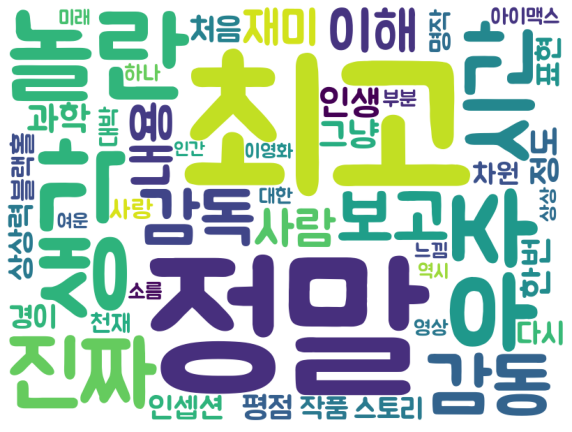

In [20]:
cloud=wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize = (10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# 단어표현 방법(Bag of words (BoW))

In [21]:
import re
from konlpy.tag import Okt

In [26]:
# 함수 정의
okt = Okt()

def bow_analyze(txt):
    token = re.sub("[-=.#/?:$]","",txt) # 특수문자 제거
    token = okt.morphs(token) # OKT 형태소 분석기를 통해 토큰화 작업을 수행한 후 token에 저장
    word2index = {}
    bow = []
    for voca in token:
        if voca not in word2index.keys():
            word2index[voca] = len(word2index)
    #token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘어감
    
            bow.insert(len(word2index)-1,1)
    # bow 기본값 1을 넣어줌, 단어의 개수는 최소 글자 1개 이상으로 처리
    
        else:
            index = word2index.get(voca)
    #재등장하는 단어의 인덱스를 받아옴
    
            bow[index] = bow[index]+1
    # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줌으로써 단어의 개수를 카운트함
    
    print(word2index)
    print(bow)

In [27]:
txt1 = "빅데이터 분석 및 응용과목은 시험도 없고 과제가 생각보다 너무 적다"
bow_analyze(txt1)

{'빅데이터': 0, '분석': 1, '및': 2, '응용': 3, '과목': 4, '은': 5, '시험': 6, '도': 7, '없고': 8, '과제': 9, '가': 10, '생각': 11, '보다': 12, '너무': 13, '적다': 14}
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
txt2 = '전공 과목 가운데 취업에 크게 도움되는 과목들은 주로 코딩 과목들이다'
bow_analyze(txt2)

{'전공': 0, '과목': 1, '가운데': 2, '취업': 3, '에': 4, '크게': 5, '도움': 6, '되는': 7, '들': 8, '은': 9, '주로': 10, '코딩': 11, '이다': 12}
[1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [29]:
txt3 = '마지막 학기를 잘 마무리하는 것도 중요하지만 이후 진로에 대한 고민이 더 큰 과제이다'
bow_analyze(txt3)

{'마지막': 0, '학기': 1, '를': 2, '잘': 3, '마무리': 4, '하는': 5, '것': 6, '도': 7, '중요하지만': 8, '이후': 9, '진로': 10, '에': 11, '대한': 12, '고민': 13, '이': 14, '더': 15, '큰': 16, '과제': 17, '이다': 18}
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
bow_analyze(txt1+txt2+txt3)

{'빅데이터': 0, '분석': 1, '및': 2, '응용': 3, '과목': 4, '은': 5, '시험': 6, '도': 7, '없고': 8, '과제': 9, '가': 10, '생각': 11, '보다': 12, '너무': 13, '적다': 14, '전공': 15, '가운데': 16, '취업': 17, '에': 18, '크게': 19, '도움': 20, '되는': 21, '들': 22, '주로': 23, '코딩': 24, '이다': 25, '마지막': 26, '학기': 27, '를': 28, '잘': 29, '마무리': 30, '하는': 31, '것': 32, '중요하지만': 33, '이후': 34, '진로': 35, '대한': 36, '고민': 37, '이': 38, '더': 39, '큰': 40}
[1, 1, 1, 1, 4, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


- BOw는 각 단어가 등장한 횟수를 수치화 하는 텍스트 표현 방법이기 때문에, 주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 사용됨
- 분류 문제나 여러 문서간의 유사도를 구하는 문제에 주로 활용

# CountVectorizer 클래스로 BoW 구현하기

## 영어 문장에 대해 BoW 만들기

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['You know I want your love. because I love you']
vector = CountVectorizer()

In [32]:
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수 기록

[[1 1 2 1 2 1]]


In [33]:
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지 확인

{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### countvectorizer가 기본적으로 길이가 2이상인 문자에만 토큰으로 인식 - i는 제거

### countvectorizer는 띄어쓰기만으로 토큰화가 이루어지므로 한글에서는 조사로 인해 제한적

In [34]:
text = ["Family is not an important thing. It's everything." ]
# stop word란 불용어를 의미
vect = CountVectorizer(stop_words=['the','a','an','is','not'])
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### 불용어를 지정하면, 불용어는 제외하고 BoW를 만들 수 있음

In [35]:
text = ["Family is not an important thing. It's everything." ]
# stop word란 불용어를 의미 - 자체 불용어 목록 사용
vect = CountVectorizer(stop_words='english')
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


# tf idf

## DTM(Document-term - matrix) 문서용어 행렬

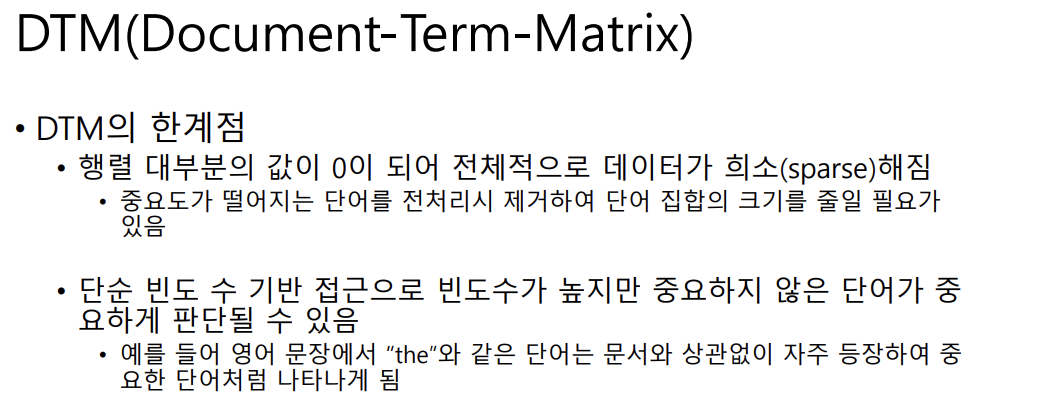

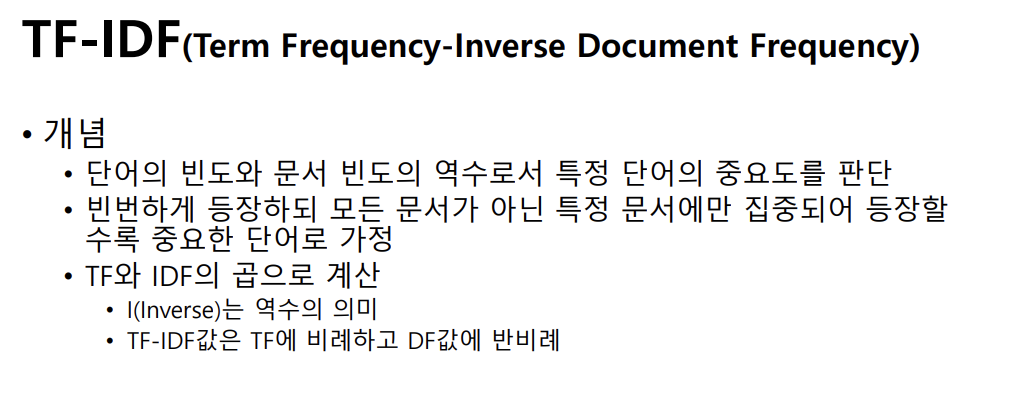

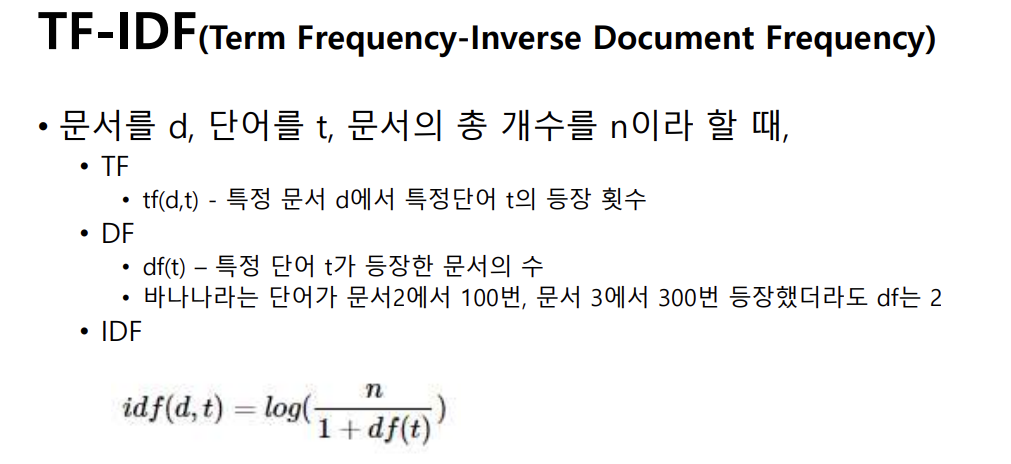

- df 값이 커지면 idf 값은 줄어들고 df값이 작아지면 idf값은 커진다
- idf가 커지면 tf-idf값도 커짐

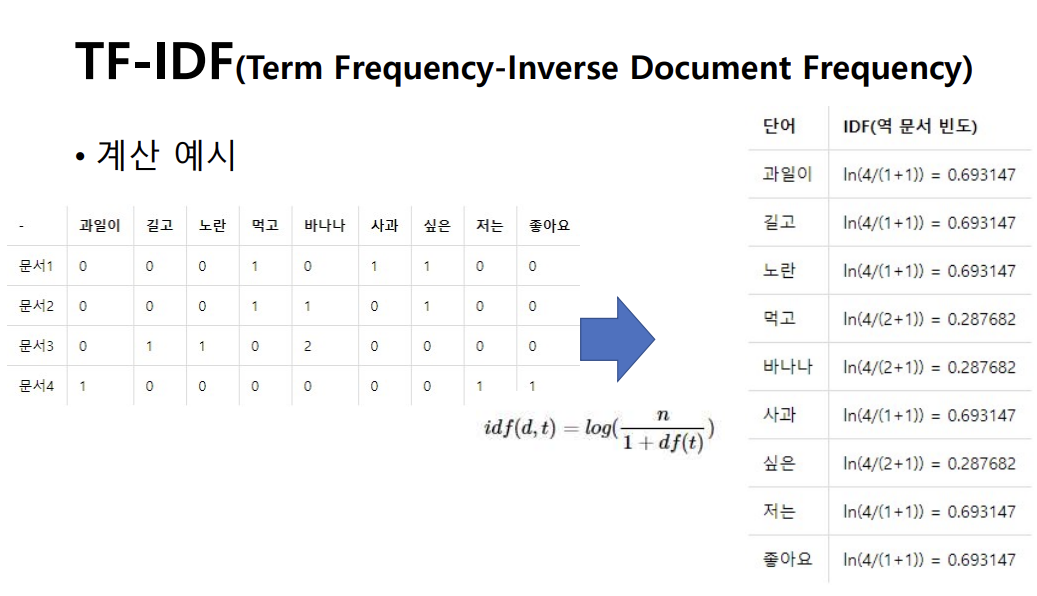

In [2]:
import pandas as pd
from math import log

In [3]:
docs = [
    '먹고 싶은 사과',
    '먹고 싶은 바나나',
    '길고 노란 바나나 바나나',
    '저는 과일이 좋아요'
]
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [4]:
N = len(docs) # 총 문서의 수
def tf(t,d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))
    
def tfidf(t,d):
    return tf(t,d)*idf(t)

In [5]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t,d))
        
tf_ = pd.DataFrame(result, columns=vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [6]:
result =[]
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    
idf_ = pd.DataFrame(result, index= vocab, columns = ['IDF'])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [7]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns= vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


# 토큰

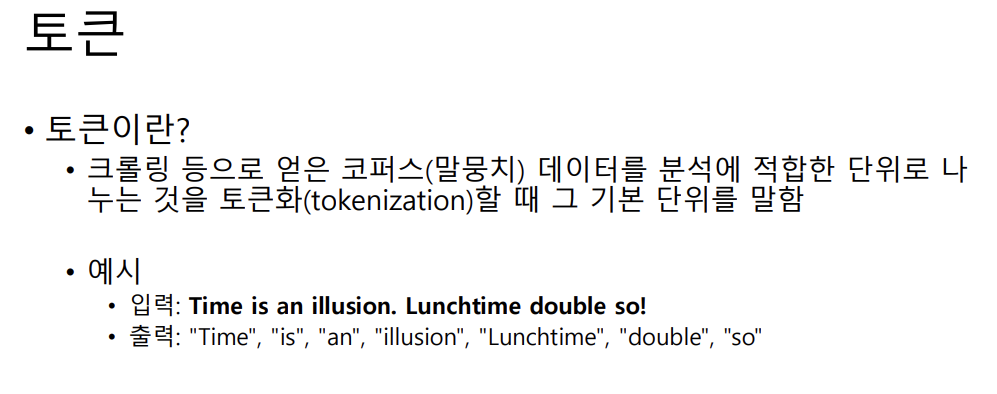

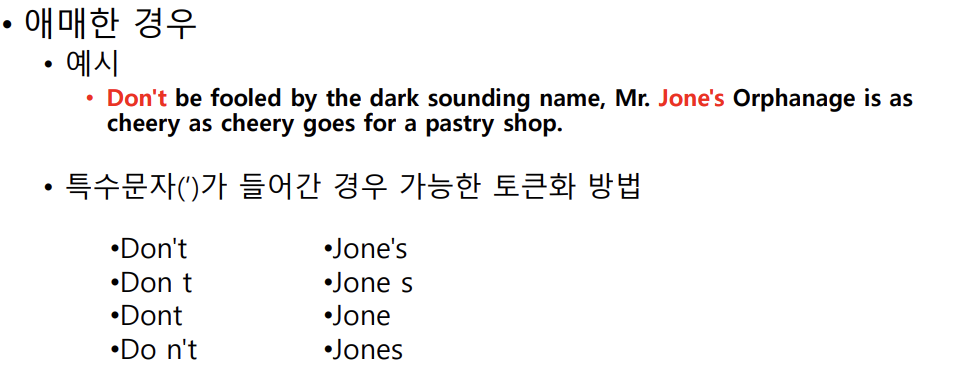

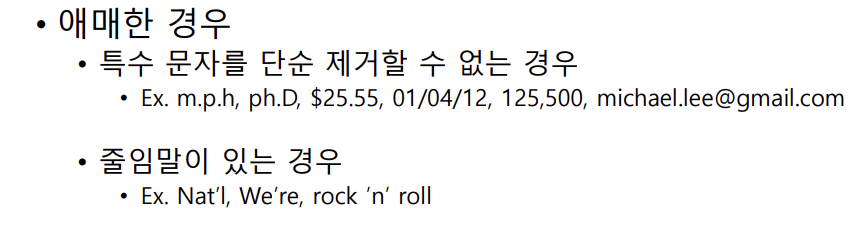

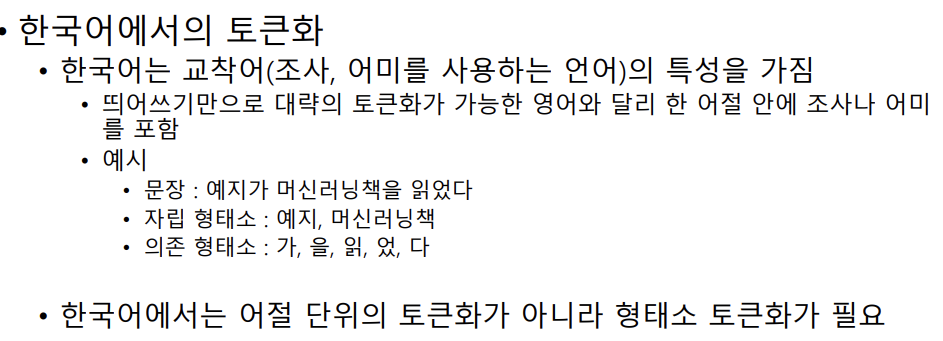

### Okt분석기

In [42]:
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))
print(okt.pos('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))
print(okt.nouns('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
['코딩', '당신', '연휴', '여행']


### 꼬꼬마 분석기

In [43]:
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.morphs('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))
print(kkma.pos('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))
print(kkma.nouns('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
['코딩', '당신', '연휴', '여행']


### 예시 - 아버지가방에들어가신다

In [44]:
print("okt형태소분석기:", okt.morphs('아버지가방에들어가신다'))
print("kkma형태소분석기:", kkma.morphs('아버지가방에들어가신다'))

okt형태소분석기: ['아버지', '가방', '에', '들어가신다']
kkma형태소분석기: ['아버지', '가방', '에', '들어가', '시', 'ㄴ다']
